In [ ]:
!pip install opendatasets
import pandas as pd
import numpy as np
import os
from torch import nn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
import opendatasets as od
import pandas as pd
od.download("https://www.kaggle.com/datasets/sudarshanvaidya/random-images-for-face-emotion-recognition/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: idoumouahmed
Your Kaggle Key: ··········


100%|██████████| 45.6M/45.6M [00:00<00:00, 143MB/s]


In [ ]:
import opendatasets as od
import pandas as pd
od.download("https://www.kaggle.com/datasets/aadityasinghal/facial-expression-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: idoumouahmed
Your Kaggle Key: ··········


100%|██████████| 60.7M/60.7M [00:00<00:00, 64.4MB/s]


# **Load the Data**

In [ ]:
TRAIN_DIR = '/content/facial-expression-dataset/train/train'
TEST_DIR = '/content/facial-expression-dataset/test/test'
shuffled_d = '/content/random-images-for-face-emotion-recognition'

In [ ]:
def load_images(dir_path):
    labels = []
    img_paths = []

    for folder in os.listdir(dir_path):
        folder_path = os.path.join(dir_path, folder)

        # Check if it's a directory
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                img_path = os.path.join(folder_path, filename)
                img_paths.append(img_path)
                labels.append(folder)
            print(folder, ' Completed')

    return img_paths, labels

train = pd.DataFrame()
shuffled_data = pd.DataFrame()
# Chemin du dossier que vous souhaitez supprimer
chemin_dossier = '/content/random-images-for-face-emotion-recognition/contempt'

# Utilisez la commande !rm -r pour supprimer le dossier et tous ses contenus
!rm -r {chemin_dossier}
train['images'], train['labels'] = load_images(TRAIN_DIR)
test = pd.DataFrame()
test['images'], test['labels'] = load_images(TEST_DIR)
shuffled_data['images'],shuffled_data['labels'] = load_images(shuffled_d)

angry  Completed
surprise  Completed
neutral  Completed
sad  Completed
disgust  Completed
happy  Completed
fear  Completed
angry  Completed
surprise  Completed
neutral  Completed
sad  Completed
disgust  Completed
happy  Completed
fear  Completed
happiness  Completed
surprise  Completed
neutrality  Completed
anger  Completed
sadness  Completed
disgust  Completed
fear  Completed


In [ ]:
correspondance_labels = {
    "anger": "angry",
    "disgust": "disgust",
    "fear": "fear",
    "happiness": "happy",
    "neutrality": "neutral",
    "sadness": "sad",
    "surprise": "surprise",

}

In [ ]:
shuffled_data['labels'][0]

'happiness'

In [ ]:
for i in range(len(shuffled_data)):
  shuffled_data['labels'][i] = correspondance_labels[shuffled_data['labels'][i]]


In [ ]:
import pandas as pd

# Concaténation horizontale
DATA = pd.concat([train, test, shuffled_data], axis=0)
# shuffle the dataset
DATA = DATA.sample(frac = 1).reset_index(drop=True)
DATA.head()


,images,labels
0,/content/facial-expression-dataset/train/train...,neutral
1,/content/facial-expression-dataset/train/train...,surprise
2,/content/facial-expression-dataset/train/train...,happy
3,/content/facial-expression-dataset/train/train...,happy
4,/content/random-images-for-face-emotion-recogn...,angry


In [ ]:
shuffled_data['labels'].value_counts()

happy       1406
angry        890
surprise     775
sad          746
fear         570
neutral      524
disgust      439
Name: labels, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X = DATA['images']
y= DATA['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32989,), (8248,), (32989,), (8248,))

# **Exploratory Data Analysis**

<Axes: xlabel='labels', ylabel='count'>

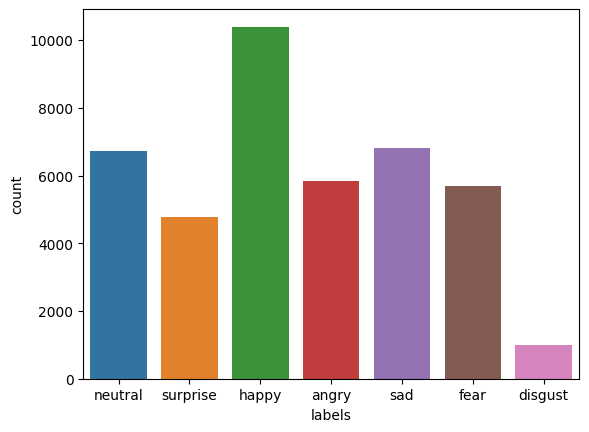

In [ ]:
sns.countplot(data=DATA, x='labels')

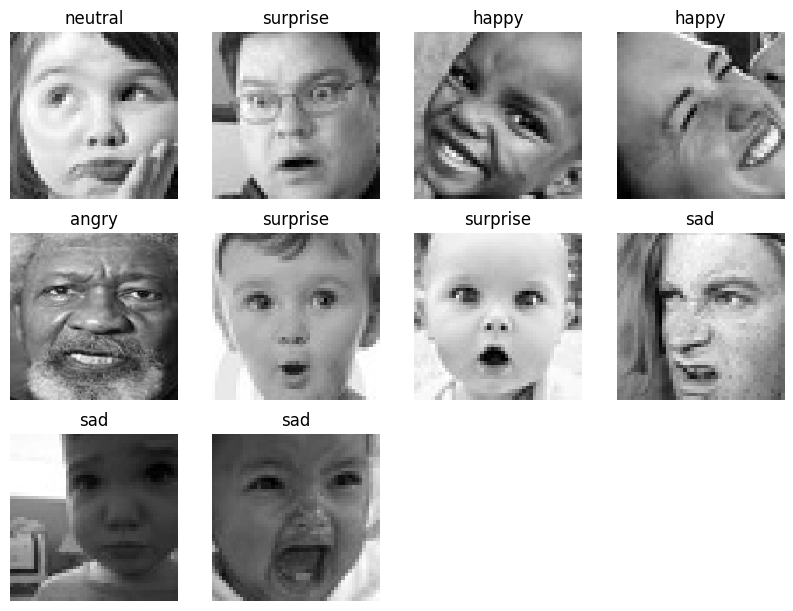

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
# display grid of images
plt.figure(figsize=(10,10))
file = DATA.iloc[0:10]
images= file['images']
target = file['labels']
train = train.sample(frac = 1).reset_index(drop=True)
for idx in range(len(images)) :
  plt.subplot(4,4,idx+1)
  imgs = Image.open(images[idx])
  plt.imshow(imgs , cmap='gray')
  plt.axis('off')
  plt.title(target[idx])

In [ ]:
from tqdm import tqdm
import torch
import torchvision.transforms as transforms
from torchvision import datasets

# transform path to image
def read_images(images):
    features = []
    transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                    transforms.Resize(size=(64, 64)),
                                    transforms.ToTensor()
 ])

    for img_path in tqdm(images):
      img = datasets.folder.default_loader(img_path)
      img = transform(img)
      features.append(img)

    features = torch.stack(features)
    return features

train_features= read_images(X_train)
test_features = read_images(X_test)

X_train = train_features/255.0
X_test = test_features/255.0

100%|██████████| 8248/8248 [00:05<00:00, 1535.73it/s]


In [ ]:
X_train.shape,X_test.shape

(torch.Size([32989, 1, 64, 64]), torch.Size([8248, 1, 64, 64]))

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [ ]:
from torch.utils.data import DataLoader,TensorDataset
# Setup  the batch size hyperparametre
BATCH_SIZE = 32


# Make sure the data is PyTorch tensors
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)
X_train.shape
# Create a dataset for training and testing data
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [ ]:
import torchvision.transforms as T  # Remplacez par la classe de votre ensemble de données
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data import ConcatDataset

# Définissez votre fonction image_transformations
def image_transformations():
    train_trans = [
        T.RandomRotation(15),
        T.RandomAffine(
            degrees=0,
            translate=(0.01, 0.12),
            scale=(0.8, 1.2),
            shear=(0.01, 0.03)
        ),
        T.RandomHorizontalFlip(),
        T.ToTensor(),
    ]

    test_trans = [
        T.ToTensor(),
    ]

    train_transformations = T.Compose(train_trans)
    test_transformations = T.Compose(test_trans)

    return train_transformations, test_transformations

# Utilisez la fonction image_transformations pour obtenir les transformations
train_transformations, test_transformations = image_transformations()

# Chargez votre jeu de données d'entraînement, par exemple, en utilisant votre propre classe de dataset


# Appliquez les transformations aux données d'entraînement pour obtenir des tensors d'images
transformed_data = []
for image, label in tqdm(train_dataset):
   # Convertissez le tensor en une image au format PIL
   image_pil = T.ToPILImage()(image)
   # Appliquez les transformations sur l'image PIL
   transformed_image_pil = train_transformations(image_pil)

   transformed_data.append((transformed_image_pil, label))

# Séparez les images et les labels
images, labels = zip(*transformed_data)

# Convertissez les listes d'images et de labels en tensors PyTorch
images = torch.stack(images)
labels = torch.tensor(labels)

# Créez un TensorDataset à partir des tensors d'images et de labels
transformed_dataset = TensorDataset(images, labels)
concatenated_dataset = ConcatDataset([train_dataset, transformed_dataset])

train_loader1 = DataLoader(concatenated_dataset, batch_size=7, shuffle=True, num_workers=4)

# Maintenant, train_loader1 contient des tensors d'images résultant de l'application des transformations à votre jeu de données d'entraînement.


100%|██████████| 32989/32989 [00:19<00:00, 1724.71it/s]


In [ ]:
import torchvision.transforms as T  # Remplacez par la classe de votre ensemble de données
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data import ConcatDataset

# Définissez votre fonction image_transformations
def image_transformations():
    train_trans = [
        T.RandomRotation(15),
        T.RandomAffine(
            degrees=0,
            translate=(0.01, 0.12),
            scale=(0.8, 1.2),
            shear=(0.01, 0.03)
        ),
        T.RandomHorizontalFlip(),
        T.ToTensor(),
    ]

    test_trans = [
        T.ToTensor(),
    ]

    train_transformations = T.Compose(train_trans)
    test_transformations = T.Compose(test_trans)

    return train_transformations, test_transformations

# Utilisez la fonction image_transformations pour obtenir les transformations
train_transformations, test_transformations = image_transformations()

# Chargez votre jeu de données d'entraînement, par exemple, en utilisant votre propre classe de dataset


# Appliquez les transformations aux données d'entraînement pour obtenir des tensors d'images
transformed_data = []
for image, label in tqdm(test_dataset):
   # Convertissez le tensor en une image au format PIL
   image_pil = T.ToPILImage()(image)
   # Appliquez les transformations sur l'image PIL
   transformed_image_pil = test_transformations(image_pil)

   transformed_data.append((transformed_image_pil, label))

# Séparez les images et les labels
images, labels = zip(*transformed_data)

# Convertissez les listes d'images et de labels en tensors PyTorch
images = torch.stack(images)
labels = torch.tensor(labels)

# Créez un TensorDataset à partir des tensors d'images et de labels
transformed_dataset = TensorDataset(images, labels)
concatenated_dataset = ConcatDataset([test_dataset, transformed_dataset])
test_loader1 = DataLoader(concatenated_dataset, batch_size=7, shuffle=True, num_workers=4)

# Maintenant, train_loader1 contient des tensors d'images résultant de l'application des transformations à votre jeu de données d'entraînement.


100%|██████████| 8248/8248 [00:02<00:00, 2992.62it/s]


In [ ]:
print(f"dataloader : {train_loader1 , test_loader1}")
print(f"Length of train_dataloader : {len(train_loader1)} batches of {7}")
print(f"Length of test_dataloader : {len(test_loader1)} batches of {7}")

dataloader : (<torch.utils.data.dataloader.DataLoader object at 0x7bcb7c67c280>, <torch.utils.data.dataloader.DataLoader object at 0x7bcb7c67f160>)
Length of train_dataloader : 9426 batches of 7
Length of test_dataloader : 2357 batches of 7


In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_loader1))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([7, 1, 64, 64]), torch.Size([7]))

In [ ]:
# Check out what's inside the testing dataloader
test_features_batch, test_labels_batch = next(iter(test_loader1))
test_features_batch.shape, test_labels_batch.shape

(torch.Size([7, 1, 64, 64]), torch.Size([7]))

# **1. Build the Models**

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
from sklearn.metrics import f1_score

def f1_score_fn(y_true, y_pred):
    y_true = y_true.cpu().numpy()  # Convertir les tenseurs PyTorch en tableaux NumPy
    y_pred = y_pred.cpu().numpy()
    f1 = f1_score(y_true, y_pred, average='weighted')  # Vous pouvez spécifier 'micro', 'macro', 'weighted', etc., selon votre besoin
    return f1

In [ ]:
import torch
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import KFold
import statistics

def train_step_with_cv(model, data_loader, loss_fn, optimizer, accuracy_fn, device, n_splits=5, num_epochs=10):
    model.to(device)

    # Create a KFold cross-validator
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    train_acc_list = []
    dev_acc_list = []
    train_loss_list = []
    dev_loss_list = []

    for train_indices, val_indices in tqdm(kf.split(data_loader.dataset)):
        # Create data loaders for training and validation folds
        train_subset = Subset(data_loader.dataset, train_indices)
        val_subset = Subset(data_loader.dataset, val_indices)
        train_loader = DataLoader(train_subset, batch_size=data_loader.batch_size, shuffle=True)
        val_loader = DataLoader(val_subset, batch_size=data_loader.batch_size)

        model.train()

        train_loss = 0
        train_acc = 0

        for epoch in range(num_epochs):
            # Training loop
            for batch, (X, y) in enumerate(train_loader):
                # Send data to GPU
                X, y = X.float().to(device), y.long().to(device)

                # 1. Forward pass
                y_pred = model(X)

                # 2. Calculate loss
                loss = loss_fn(y_pred, y)
                train_loss += loss.item()
                train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

                # 3. Optimizer zero grad
                optimizer.zero_grad()

                # 4. Loss backward
                loss.backward()

                # 5. Optimizer step
                optimizer.step()

            train_loss /= len(train_loader)
            train_acc /= len(train_loader)

        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)

        # Validation loop
        val_loss, val_acc = eval_model(model, val_loader, loss_fn, accuracy_fn)
        dev_loss_list.append(val_loss)
        dev_acc_list.append(val_acc)

    print(f"Train Loss: {statistics.mean(train_loss_list):.5f} | Train Accuracy: {statistics.mean(train_acc_list):.2f}")
    print(f"Validation Loss: {statistics.mean(dev_loss_list):.5f} | Validation Accuracy: {statistics.mean(dev_acc_list):.2f}")

In [ ]:
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device ):
  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval() # put model in eval mode
  # Turn on inference context manager
  with torch.inference_mode():
    for X, y in data_loader:
      # Send data to GPU
      X, y = X.float().to(device), y.long().to(device)

      # 1. Forward pass
      test_pred = model(X)

      # 2. Calculate loss and accuracy
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}\n")

In [ ]:
from timeit import default_timer as timer
def print_train_time(start:float,
                        end:float,
                        device:torch.device=None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time= timer()
end_time=timer()
print_train_time(start=start_time,end=end_time,device='cpu')

Train time on cpu: 0.000 seconds


4.940299999134368e-05

In [ ]:
def eval_model(model, data_loader, loss_fn, accuracy_fn):
    model.eval()
    total_loss = 0.0
    total_acc = 0.0

    with torch.no_grad():
        for batch in data_loader:
            inputs, labels = batch
            inputs = inputs.float().to(device)
            labels = labels.long().to(device)

            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            total_loss += loss.item()

            predictions = outputs.argmax(dim=1)
            acc = f1_score_fn(labels, predictions)
            total_acc += acc

    # Calculez la somme totale de la perte et de l'accuracy, puis divisez par le nombre de lots
    avg_loss = total_loss / len(data_loader)
    avg_acc = total_acc / len(data_loader)

    return avg_loss, avg_acc

In [ ]:
import torch
import torch.nn as nn

import torch.nn as nn



class LinearWithRegularization(nn.Module):
    def __init__(self, in_features, out_features, l1_reg=0.01, l2_reg=0.01):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        self.l1_reg = l1_reg
        self.l2_reg = l2_reg

    def forward(self, x):
        # Calcul de la sortie de la couche linéaire
        out = self.linear(x)

        # Ajout de la régularisation L1 et L2 aux poids
        l1_loss = self.l1_reg * torch.sum(torch.abs(self.linear.weight))
        l2_loss = self.l2_reg * torch.sum(self.linear.weight**2)

        # Ajout de la régularisation aux pertes totales
        loss = out + l1_loss + l2_loss

        return loss

class Face_im_rec_model_1(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int,output_shape:int):
    super().__init__()
    self.bloc1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3 ,
                  stride=1 ,
                  padding=1),
            nn.BatchNorm2d(hidden_units) ,
            nn.MaxPool2d(2, 1),
            nn.ReLU())
    self.batchnorm1 = nn.BatchNorm2d(input_shape)

    self.bloc2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3 ,
                  stride=1 ,
                  padding=1),
            nn.BatchNorm2d(hidden_units) ,
            nn.MaxPool2d(2, 1),
            nn.ReLU())



    self.bloc3 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3 ,
                  stride=1 ,
                  padding=1),
            nn.BatchNorm2d(hidden_units) ,
            nn.MaxPool2d(2, 2),
            nn.ReLU())
    self.bloc4 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3 ,
                  stride=1 ,
                  padding=1),
            nn.BatchNorm2d(hidden_units) ,
            nn.MaxPool2d(2, 2),
            nn.ReLU())

    self.bloc5 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3 ,
                  stride=1 ,
                  padding=1),
            nn.BatchNorm2d(hidden_units) ,
            nn.MaxPool2d(2, 1),
            nn.ReLU())
    self.bloc6 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3 ,
                  stride=1 ,
                  padding=1),
            nn.BatchNorm2d(hidden_units) ,
            nn.MaxPool2d(2, 1),
            nn.ReLU())
    self.bloc7 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3 ,
                  stride=1 ,
                  padding=1),
            nn.BatchNorm2d(hidden_units) ,
            nn.MaxPool2d(2, 2),
            nn.ReLU())

    self.bloc8= nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_units*6*6,hidden_units*6*6),
            nn.ReLU(),
            nn.Dropout(0.3))

    self.bloc9 = nn.Sequential(
            nn.Linear(hidden_units*6*6,hidden_units*6*6),
            nn.ReLU(),
            nn.Dropout(0.5))
    self.bloc10 = nn.Sequential(
            nn.Linear(hidden_units*6*6,hidden_units*6*6),
            nn.ReLU(),
            nn.Dropout(0.3))

    self.bloc11 = nn.Sequential(
          LinearWithRegularization(hidden_units*6*6, hidden_units*6*6, l1_reg=0.01, l2_reg=0.01),
          nn.LogSoftmax(dim=1))


  def forward(self, x):
    x = self.bloc1(x)
    x = self.bloc2(x)
    x = self.bloc3(x)
    x = self.bloc4(x)
    x = self.bloc5(x)
    x = self.bloc6(x)
    x = self.bloc7(x)
    x = self.bloc8(x)
    x = self.bloc9(x)
    x = self.bloc10(x)
    x = self.bloc11(x)


    return x

In [ ]:
model_1 = Face_im_rec_model_1(input_shape=1,
                              hidden_units=10,
                              output_shape=7).to(device)

# **Training and testing model_1 using our training and test functions**

In [ ]:
x = train_features_batch[0]
x.shape,x.unsqueeze(dim=0).shape
model_1(x.unsqueeze(dim=0).to(device)).shape

torch.Size([1, 360])

In [ ]:
# setup loss function/eval metrics/optimizer
loss_fn1 = nn.CrossEntropyLoss()
optimizer1 = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.00001)

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
# Mesure du temps
from timeit import default_timer as timer
train_time_start_model_1 = timer()

# Nombre d'époques
epochs = 50
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n---------")
  train_step_with_cv(model=model_1,
                   loss_fn=loss_fn1,
                   optimizer=optimizer1,
                   accuracy_fn=f1_score_fn,
                   data_loader=train_loader1,
                     device=device)# Utilisez les données du pli actuel
  test_step(model=model_1,
                  loss_fn=loss_fn1,
                  accuracy_fn=f1_score_fn,
                  device=device)
        # Imprimez combien d'échantillons ont été vus
  if BATCH_SIZE % 400 == 0:
    print(f"Looked at {64 * len(epoch)}/{len(train_loader1.dataset)}")

train_time_end_model_1 = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_model_1,
                                            end=train_time_end_model_1,data_loader=test_loader1,device=device)  # Utilisez les données de test du pli actuel

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch:0
---------



0it [00:00, ?it/s]
1it [1:34:43, 5683.94s/it]
2it [3:10:03, 5705.09s/it]

In [ ]:
import torch
import torch.nn as nn

class VGG16Model(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super(VGG16Model, self).__init__()

        # Define convolutional layers
        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
            nn.BatchNorm2d(hidden_units),
            nn.MaxPool2d(2, 1),
            nn.ReLU())

        # Global Average Pooling
        self.block2 = nn.AdaptiveAvgPool2d(1)

        # Fully connected layer (prediction)
        self.block3 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_units, output_shape),
            nn.Softmax(dim=1))
        # Geler les paramètres
        for param in self.parameters():
            param.requires_grad = False

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)

        return x


In [ ]:
model_2 = VGG16Model(input_shape=1,
                              hidden_units=10,
                              output_shape=7).to(device)

In [ ]:
x = train_features_batch[0]
x.shape,x.unsqueeze(dim=0).shape
model_2(x.unsqueeze(dim=0).to(device)).shape

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
# Mesure du temps
from timeit import default_timer as timer
train_time_start_model_1 = timer()
log_variances = torch.tensor([0.1, 0.2])
# Nombre d'époques
epochs = 50
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n---------")
  train_step_with_cv(model=model_2,
                   data_loader=train_loader1,  # Utilisez les données du pli actuel
                   loss_fn=loss_fn1,
                   optimizer=optimizer1,
                   accuracy_fn=f1_score_fn,
                   device=device)
  test_step(model=model_2,
                  data_loader=test_loader1,  # Utilisez les données de test du pli actuel
                  loss_fn=loss_fn1,
                  accuracy_fn=f1_score_fn(X,y,log_variances),
                  device=device)
        # Imprimez combien d'échantillons ont été vus
  if BATCH_SIZE % 400 == 0:
    print(f"Looked at {64 * len(epoch)}/{len(train_loader1.dataset)}")

train_time_end_model_1 = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_model_1,
                                            end=train_time_end_model_1,
                                            device=device)
